In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [54]:
df = pd.read_csv("KNN.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

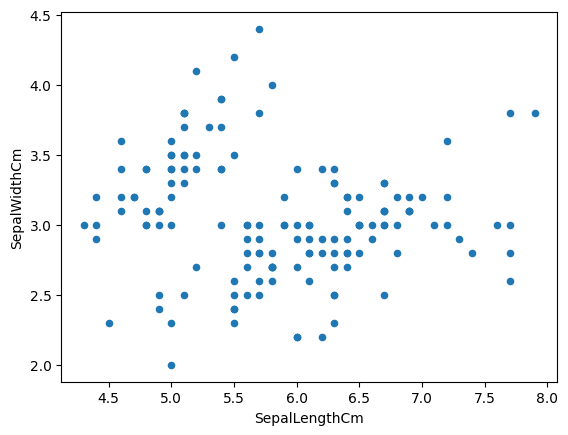

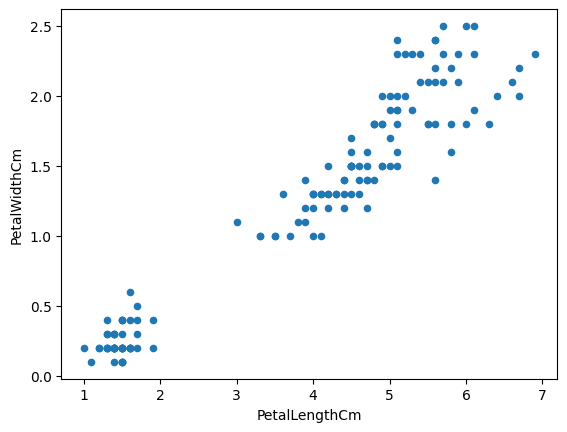

In [55]:
df.plot(kind='scatter', x="SepalLengthCm", y="SepalWidthCm")
df.plot(kind='scatter',x="PetalLengthCm", y="PetalWidthCm")

In [56]:
#hedef değişken hariç geri kalan değerlerin seçimi
X=df.iloc[:,[1,2,3,4]].values

In [57]:
#wcss hata değerini hesaplama
wcss=[] #with in cluster sum of square error
for i in range(1,11):
    kmeans =KMeans(n_clusters = i, init = 'k-means++', max_iter=200, n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Furkan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Furkan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Furkan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Furkan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

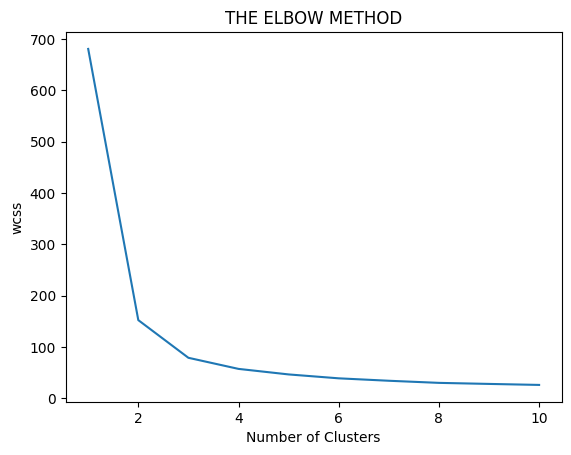

In [58]:
#ploting the results onto a line graph
#Elbow method
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [51]:
#datasete kmeans algoritmasını uygulama
kmeans =KMeans(n_clusters = 3, init = 'k-means++', max_iter=200, n_init = 10,random_state = 0)
y_kmeans = kmeans.fit_predict(X)

C:\Users\Furkan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


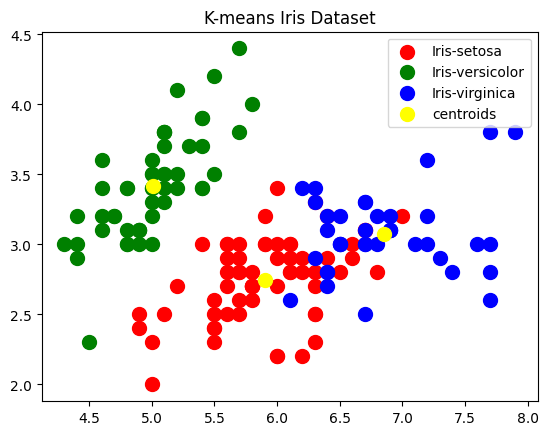

In [52]:
#Visualising the clusters with Scatter plot
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s = 100, c = 'green', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s = 100, c = 'blue', label = 'Iris-virginica')

#plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c= 'yellow', label = 'centroids')
plt.title('K-means Iris Dataset')

plt.legend()